In [3]:
import json
import os
import numpy as np
import pandas as pd


result_dir = '../results_tqfm_circle_kfold'

json_files = sorted([f for f in os.listdir(result_dir) if f.endswith('.json')])

results = []
for file in json_files:
    with open(os.path.join(result_dir, file), 'r') as f:
        data = json.load(f)
        results.append(data)
        

        
# Create DataFrame
df = pd.DataFrame(results)
df = df.sort_values('depth').reset_index(drop=True)

# Only take depth with min mean_loss
min_val_loss_indices = df.groupby('depth')['mean_loss'].idxmin()
df = df.loc[min_val_loss_indices].reset_index(drop=True)
print(df)



   run_id  depth  mean_loss  mean_acc
0       5      1   0.374134  0.843333
1       5      2   0.324854  0.870000
2       1      3   0.329615  0.810000
3       5      4   0.298710  0.843333
4       5      5   0.298061  0.813333
5       5      6   0.281673  0.873333
6       2      7   0.269522  0.816667
7       4      8   0.269312  0.886667


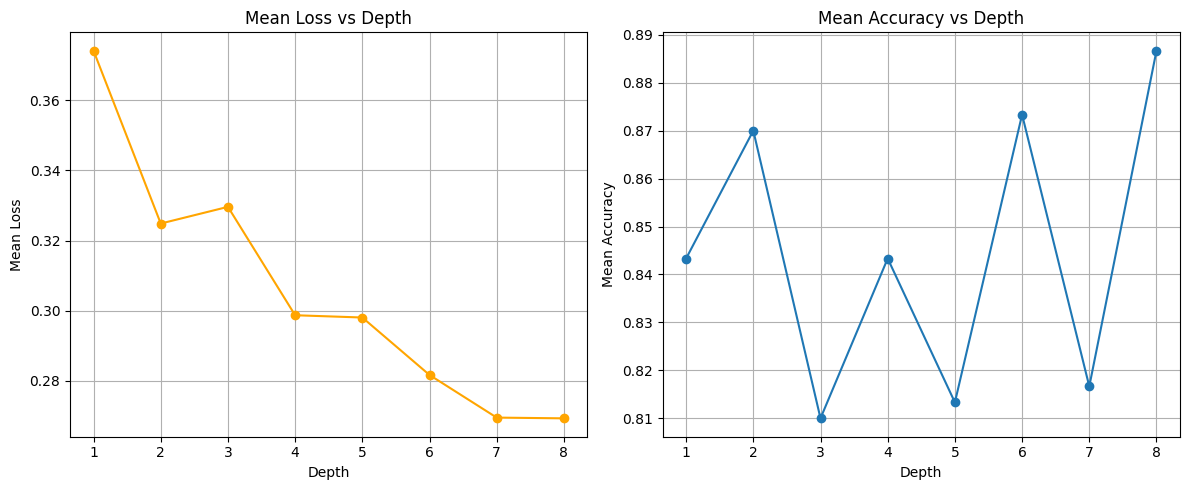

In [4]:
# Plotting
import matplotlib.pyplot as plt
depths = df['depth']
acc = df['mean_acc']
loss = df['mean_loss']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Loss plot
axes[0].plot(depths, loss, marker='o', color='orange')	
axes[0].set_title('Mean Loss vs Depth')
axes[0].set_xlabel('Depth')
axes[0].set_ylabel('Mean Loss')
axes[0].grid(True)
# Accuracy plot
axes[1].plot(depths, acc, marker='o')
axes[1].set_title('Mean Accuracy vs Depth')
axes[1].set_xlabel('Depth')
axes[1].set_ylabel('Mean Accuracy')
axes[1].grid(True)
plt.tight_layout()
plt.show()